<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Regresión Lineal Simple

Tiempo estimado: **15** minutos

## Objetivos

Al completar este laboratorio podrás:

* Usar scikit-learn para implementar una Regresión Lineal simple.
* Crear un modelo, entrenarlo, probarlo y utilizarlo.


### Importando paquetes necesarios


In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Descargando Datos
Para descargar los datos, usaremos !wget para descargarlos desde IBM Object Storage.


In [46]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

/bin/bash: line 1: wget: command not found


En caso de que estés trabajando **localmente**, elimina el comentario de la línea de abajo.


In [47]:
#!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv -o FuelConsumptionCo2.csv

## Entendiendo los Datos 

---

### `FuelConsumption.csv`:
Hemos descargado un conjunto de datos de consumo de combustible, **`FuelConsumption.csv`**, que contiene clasificaciones de consumo de combustible específicas del modelo y emisiones estimadas de dióxido de carbono para vehículos nuevos de servicio liviano para la venta al por menor en Canadá. [Fuente del conjunto de datos](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** (AÑO DEL MODELO) p.ej. 2014
- **MAKE** (MARCA) p.ej. Acura
- **MODEL** (MODELO) p.ej. ILX
- **VEHICLE CLASS** (CLASE DE VEHÍCULO) p.ej. SUV
- **ENGINE SIZE** (TAMAÑO DEL MOTOR) p.ej. 4.7
- **CYLINDERS** (CILINDROS) p.ej 6
- **TRANSMISSION** (TRANSMISIÓN) p.ej. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** (CONSUMO DE COMBUSTIBLE EN CIUDAD (L/100 km)) p.ej. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** (CONSUMO DE COMBUSTIBLE EN CARRETERA (L/100 km)) p.ej. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** (CONSUMO DE COMBUSTIBLE COMBINADO (L/100 km)) p.ej. 9.2
- **CO2 EMISSIONS (g/km)** (EMISIONES DE CO2 (g/km)) p.ej. 182   --> bajo --> 0

## Leyendo los datos 


In [48]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Exploración de Datos 
Primero, realicemos una exploración descriptiva de nuestros datos.


In [49]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Seleccionemos algunas características para explorar más.

In [50]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Podemos graficar cada una de estas características:

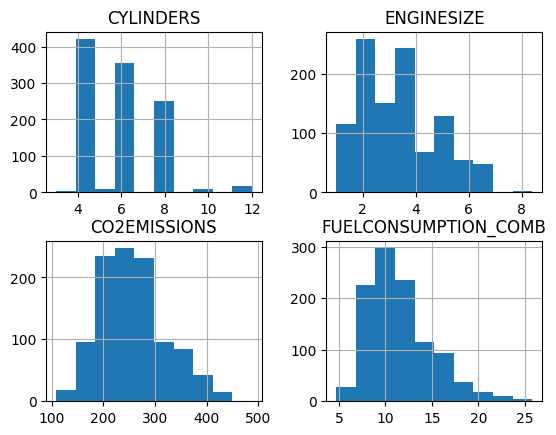

In [51]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Ahora, grafiquemos cada una de estas características contra la Emisión, para ver cuán **lineal** es su relación:

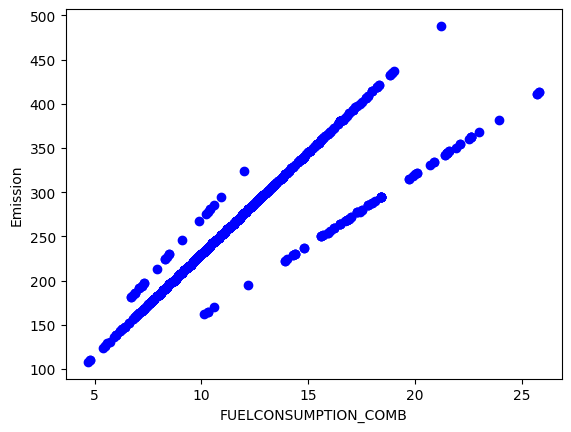

In [52]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

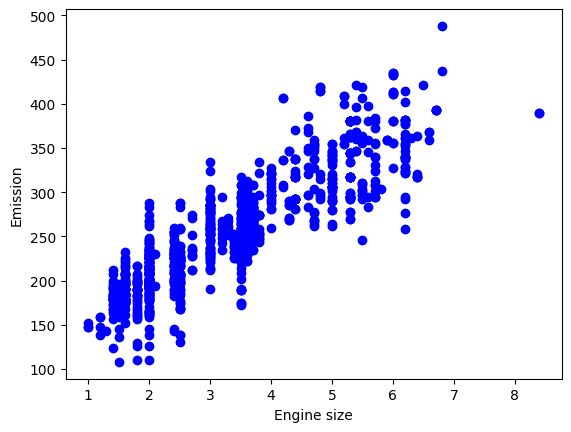

In [53]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Práctica 
Grafica **CILINDROS** (*CYLINDER*) vs la Emisión, para ver cuán lineal es su relación:

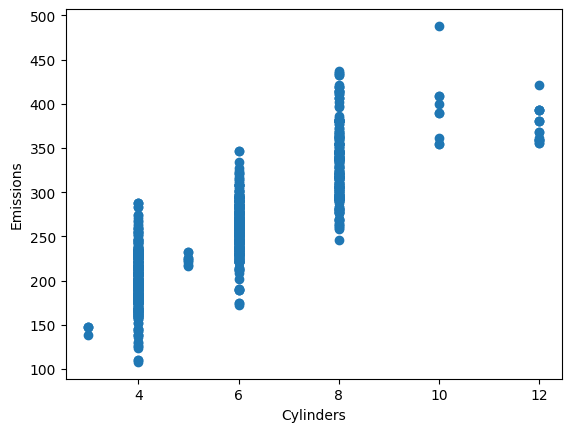

In [54]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS)
plt.xlabel("Cylinders")
plt.ylabel("Emissions")
plt.show()

#### Creando el conjunto de datos de entrenamiento y prueba
La División de Entrenamiento/Prueba (*Train/Test Split*) consiste en dividir el conjunto de datos en conjuntos de entrenamiento y prueba que son **mutuamente excluyentes**. Después, se entrena con el conjunto de entrenamiento y se prueba con el conjunto de prueba.
Esto proporcionará una evaluación más precisa sobre la **exactitud fuera de la muestra** (*out-of-sample accuracy*), ya que el conjunto de datos de prueba no forma parte del conjunto de datos que se ha utilizado para entrenar el modelo. Por lo tanto, nos da una mejor comprensión de qué tan bien nuestro modelo **generaliza** a nuevos datos.

Esto significa que conocemos el resultado de cada punto de datos en el conjunto de prueba, ¡lo que lo hace ideal para probar! Dado que estos datos no se han utilizado para entrenar el modelo, el modelo no tiene conocimiento del resultado de estos puntos de datos. Por lo tanto, en esencia, es verdaderamente una prueba fuera de la muestra.

Dividamos nuestro conjunto de datos en conjuntos de entrenamiento y prueba. El **80%** del conjunto de datos completo se utilizará para el entrenamiento y el **20%** para las pruebas. Creamos una máscara para seleccionar filas aleatorias utilizando la función **`np.random.rand()`**:

In [55]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Modelo de Regresión Simple
La Regresión Lineal ajusta un modelo lineal con coeficientes $\beta = (\beta_1, ..., \beta_n)$ para **minimizar la 'suma residual de cuadrados'** entre el valor real $y$ en el conjunto de datos, y el valor predicho $\hat{y}$ utilizando una aproximación lineal.

#### Distribución de los datos de entrenamiento

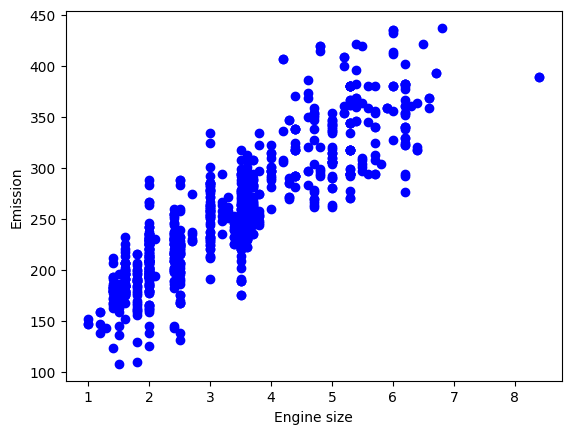

In [56]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modelado 
Utilizando el paquete **sklearn** para modelar los datos.

In [57]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.31173884]]
Intercept:  [124.2143724]


Como se mencionó antes, el **Coeficiente** y el **Intercepto** en la regresión lineal simple, son los parámetros de la línea de ajuste.
Dado que es una regresión lineal simple, con solo 2 parámetros, y sabiendo que los parámetros son el intercepto y la pendiente de la línea, sklearn puede estimarlos directamente a partir de nuestros datos.
Observa que todos los datos deben estar disponibles para recorrerlos y calcular los parámetros.

#### Gráficos de salida

Podemos graficar la línea de ajuste sobre los datos:

Text(0, 0.5, 'Emission')

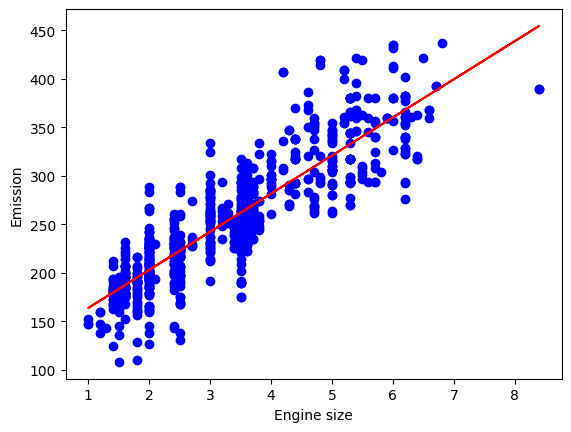

In [58]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluación 
Comparamos los valores reales y los valores predichos para calcular la **precisión** de un modelo de regresión. Las métricas de evaluación desempeñan un papel clave en el desarrollo de un modelo, ya que proporcionan información sobre las áreas que requieren mejora.

Existen diferentes métricas de evaluación de modelos; usemos **MSE** aquí para calcular la precisión de nuestro modelo basándonos en el conjunto de prueba:

* **Error Absoluto Medio (*Mean Absolute Error - MAE*)**: Es la media del valor absoluto de los errores. Esta es la métrica más fácil de entender ya que es simplemente el error promedio.

* **Error Cuadrático Medio (*Mean Squared Error - MSE*)**: El Error Cuadrático Medio (MSE) es la media del error al cuadrado. Es más popular que el Error Absoluto Medio porque la atención se centra más en los errores grandes. Esto se debe a que el término al cuadrado aumenta exponencialmente los errores mayores en comparación con los más pequeños.

* **Raíz del Error Cuadrático Medio (*Root Mean Squared Error - RMSE*)**.

* **R-cuadrado (*R-squared*)** no es un error, sino una métrica popular para medir el **rendimiento** de tu modelo de regresión. Representa cuán cerca están los puntos de datos de la línea de regresión ajustada. Cuanto mayor sea el valor de R-cuadrado, mejor se ajusta el modelo a tus datos. La mejor puntuación posible es **1.0** y puede ser negativa (porque el modelo puede ser arbitrariamente peor).

In [59]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 24.76
Residual sum of squares (MSE): 1060.12
R2-score: 0.74


## Ejercicio


Veamos cuáles son las métricas de evaluación si entrenamos un modelo de regresión utilizando la característica **`FUELCONSUMPTION_COMB`**.

Comienza seleccionando **`FUELCONSUMPTION_COMB`** como los datos de `train_x` del *dataframe* `train`, luego selecciona **`FUELCONSUMPTION_COMB`** como los datos de `test_x` del *dataframe* `test`.

In [60]:
# mask = np.random.rand(len(df)) < 0.8
# train = cdf[mask]
# test = cdf[~mask]

train_x = np.asanyarray(train[["FUELCONSUMPTION_COMB"]])

test_x = np.asanyarray(test[["FUELCONSUMPTION_COMB"]])

Ahora entrena un **Modelo de Regresión Lineal** utilizando el `train_x` que creaste y el `train_y` creado previamente.

In [61]:
regr = linear_model.LinearRegression()

print(train_x.shape)
print(train_y.shape)
#ADD CODE
regr.fit(train_x, train_y)

(851, 1)
(851, 1)


LinearRegression()

Encuentra las predicciones usando la función **`predict`** del modelo y los datos de `test_x`.

In [62]:
predictions = regr.predict(test_x)

Finalmente, utiliza las **`predictions`** y los datos de `test_y` y encuentra el valor del **Error Absoluto Medio (MAE)** usando las funciones **`np.absolute`** y **`np.mean`**, como se hizo anteriormente.

In [69]:
#ADD CODE
from sklearn.metrics import r2_score

#np.mean(np.absolute(test_y_ - test_y))
mae = np.mean(np.absolute(predictions - test_y))
print(f"MAE: {mae}")
print(f"R2: {r2_score(test_y, predictions)}")

MAE: 20.062991980130214
R2: 0.8164158978436677


Podemos observar que el MAE es mucho **peor** cuando entrenamos usando **`ENGINESIZE`** que con **`FUELCONSUMPTION_COMB`**.

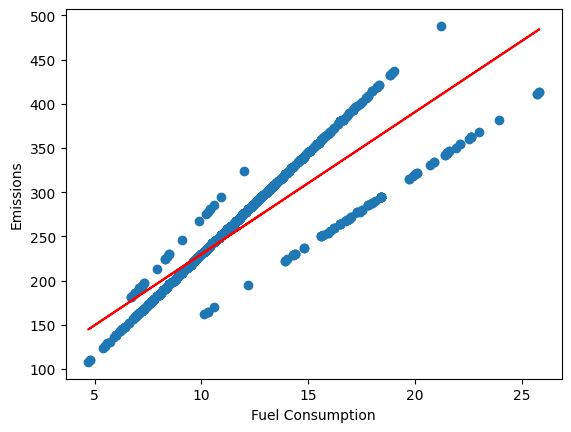

In [67]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Fuel Consumption")
plt.ylabel("Emissions")
plt.show()

### ¡Gracias por completar este laboratorio! 🎉

---

## Autor

Saeed Aghabozorgi


### Otros Contribuidores

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

Azim Hirjani

### Traducción

<a href="https://www.linkedin.com/in/carlostessier/" target="_blank">Carlos Tessier</a>

## <h3 align="center"> © Corporación IBM. Todos los derechos reservados. <h3/>

